# Zonal Statistics
---
### Objectives:
- Extract zones from the vector dataset
- Convert vector data to raster
- Calculate raster statistics over zones


In [3]:
#import libs gpd and rxr
import rioxarray
import geopandas as gpd

In [4]:
# load vector data(fields_cropped) and raster data(ndvi)
fields =  gpd.read_file('fields_cropped.zip')

In [5]:
ndvi = rioxarray.open_rasterio('ndvi.tif').squeeze()

In [6]:
ndvi.shape

(1000, 1000)

In [9]:
# convert crs to prepare for zone statistics on ndvi
fields_utm = fields.to_crs(ndvi.rio.crs)

In [10]:
# create a list like [[geom1, code1], [geom2, code2], [...], ...]
geom = fields_utm[['geometry','gewascode']].values.tolist()
geom

[[<POLYGON ((626770.528 5817144.468, 626781.724 5817152.569, 626780.448 581715...>,
  265],
 [<POLYGON ((627741.956 5816647.845, 627706.773 5816625.645, 627697.895 581662...>,
  265],
 [<POLYGON ((628368.338 5816039.145, 628360.168 5816037.509, 628357.991 581603...>,
  265],
 [<POLYGON ((628531.328 5816773.509, 628530.147 5816773.222, 628526.451 581677...>,
  265],
 [<POLYGON ((628529.639 5816655.814, 628536.224 5816659.424, 628540.512 581666...>,
  265],
 [<POLYGON ((629488.997 5816167.321, 629461.341 5816187.604, 629462.497 581618...>,
  265],
 [<POLYGON ((629869.718 5816124.012, 629868.182 5816121.294, 629861.225 581612...>,
  265],
 [<POLYGON ((629668.683 5816608.938, 629666.355 5816611.116, 629663 5816617.31...>,
  265],
 [<POLYGON ((629882.824 5816200.104, 629881.615 5816193.945, 629668.838 581622...>,
  265],
 [<POLYGON ((630011.021 5816173.308, 629998.802 5816174.624, 629996.599 581617...>,
  265],
 [<POLYGON ((629347.393 5816142.455, 629345.656 5816143.648, 629344.969 581614..

In [12]:
# rasterize the fields polygons to match the ndvi data
from rasterio import features
fields_rasterized = features.rasterize(geom, out_shape=ndvi.shape, transform=ndvi.rio.transform())

In [14]:
import numpy as np
print(fields_rasterized.shape)
print(np.unique(fields_rasterized))

(1000, 1000)
[  0 259 265 266 331 332 335 863]


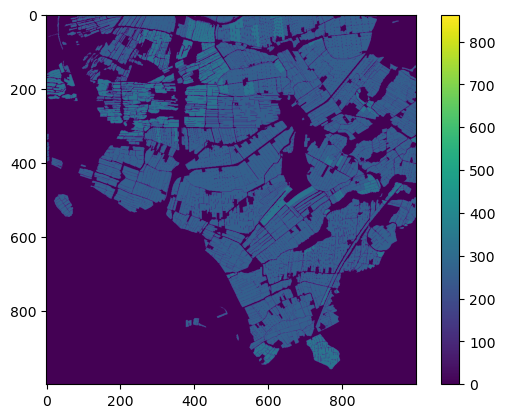

In [16]:
from matplotlib import pyplot as plt
plt.imshow(fields_rasterized)
plt.colorbar()

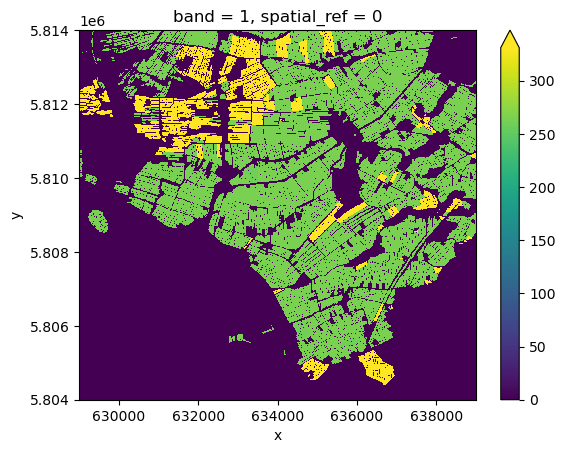

In [17]:
# Now we can make an xarray object of the crop codes from the rasterized fields
import xarray as xr
fields_rasterized_xarr = ndvi.copy()
fields_rasterized_xarr.data = fields_rasterized

fields_rasterized_xarr.plot(robust=True)

In [19]:
# now we can easily calculate all statistics in one go
from xrspatial import zonal_stats
zonal_stats(fields_rasterized_xarr, ndvi)

,zone,mean,max,min,sum,std,var,count
0,0,0.289664,0.998401,-0.779323,168307.906250,0.333217,0.111033,581045.0
1,259,0.511162,0.882536,0.275229,1739.482910,0.113349,0.012848,3403.0
2,265,0.760420,0.921048,0.175774,261019.406250,0.092681,0.008590,343257.0
3,266,0.782225,0.921875,0.419406,4094.167969,0.079246,0.006280,5234.0
4,331,0.692582,0.897810,0.210108,42135.968750,0.099737,0.009948,60839.0
5,332,0.687813,0.844242,0.330599,1282.083984,0.104339,0.010887,1864.0
6,335,0.631453,0.871633,0.225331,1209.231934,0.153081,0.023434,1915.0
7,863,0.484567,0.688546,0.210500,7.268505,0.165823,0.027497,15.0


### Optional Task for NDVI_classified

In [20]:
ndvi_classified = rioxarray.open_rasterio("ndvi_classified.tif").squeeze()

In [21]:
zonal_stats(ndvi_classified, ndvi)

,zone,mean,max,min,sum,std,var,count
0,1,-0.228646,-0.000456,-0.779323,-28531.810547,0.079086,0.006255,124786.0
1,2,0.120808,0.199849,0.000000,10243.048828,0.050919,0.002593,84788.0
2,3,0.496233,0.700000,0.200000,210930.171875,0.144245,0.020807,425063.0
3,4,0.791200,0.998401,0.700022,287154.062500,0.049777,0.002478,362935.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
zonal_stats(fields_rasterized, ndvi)

ValueError: input arrays must have same type